In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#구글 코랩 글꼴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [ ]:
df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## Q1. 전국 시도별 약국수를 구해주세요!

* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
* 다음의 결과가 나오도록 구합니다.
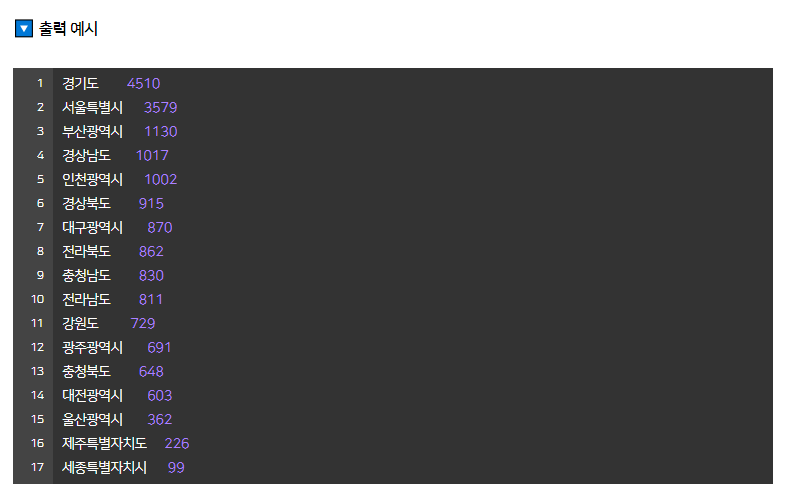

In [ ]:
# 민소희님 답안
df[['시','구','상세주소']] = df['도로명주소'].str.split(' ',n=2,expand=True)
pharmacy = df[df["상권업종소분류명"]=="약국"]
pharmacy["시"].value_counts()

경기도        4560
서울특별시      3579
부산광역시      1130
경상남도       1030
인천광역시      1012
경상북도        915
대구광역시       870
전라북도        862
충청남도        831
전라남도        811
강원도         729
광주광역시       691
충청북도        654
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시, dtype: int64

In [ ]:
# 장병용
# df_sido_farmercy = df[df['상권업종소분류명']=='약국'].groupby('시도명').size().sort_values(ascending=False)
# df_sido_farmercy

## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

* 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
* 다음의 결과가 나오도록 구합니다.
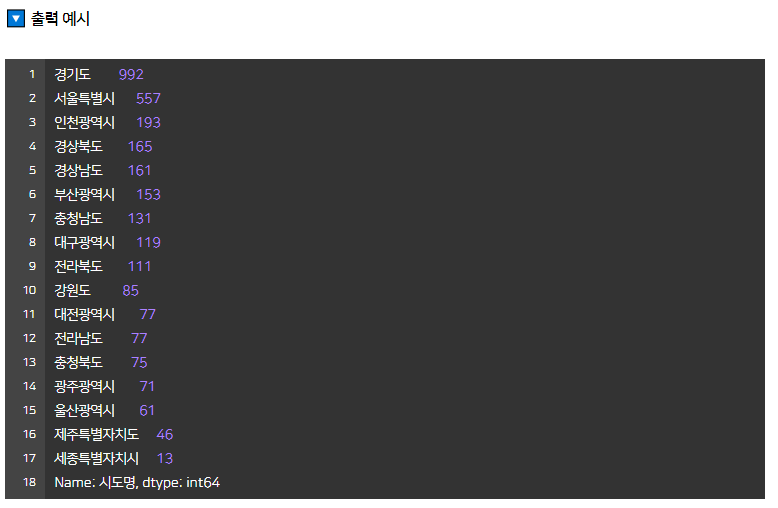

In [ ]:
# 민소희님 답안
plt.rc('font', family='NanumBarunGothic')
animals = df[df["상권업종소분류명"]=="동물병원"]

#sns 차트
# sns.countplot(data=animals,y="시")

# plot 차트
# animals=animals["시"].value_counts()
# animals.plot.bar()

#결과 값
animals["시"].value_counts()



경기도        1000
서울특별시       557
인천광역시       194
경상북도        165
경상남도        163
부산광역시       153
충청남도        131
대구광역시       119
전라북도        111
강원도          85
대전광역시        77
전라남도         77
충청북도         75
광주광역시        71
울산광역시        61
제주특별자치도      46
세종특별자치시      13
Name: 시, dtype: int64

In [ ]:
# 장병용
# df_sido_anihospital = df[df['상권업종소분류명']=='동물병원'].groupby('시도명').size().sort_values(ascending=False)
# df_sido_anihospital

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!
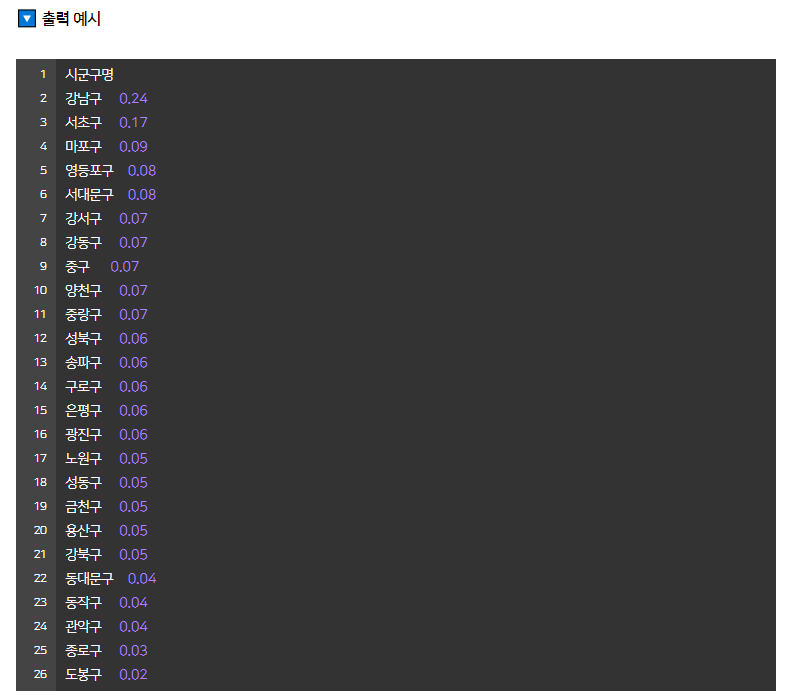

In [ ]:
# 전체 병원을 특정짓기 위해 값 확인
df_seoul = df[(df['시도명']=='서울특별시')]
df_seoul['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '유사의료업', '수의업', '의료관련서비스업'], dtype=object)

In [ ]:
# 장병용
df_seoul_medical = df_seoul[df_seoul['상권업종소분류명'].str.contains('피부|성형')]

Q3 = df_seoul_medical.groupby('시군구명').size() / df_seoul[df_seoul['상권업종중분류명']=='병원'].groupby('시군구명').size()
Q3.sort_values(ascending=False).round(2)

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
dtype: float64

## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html
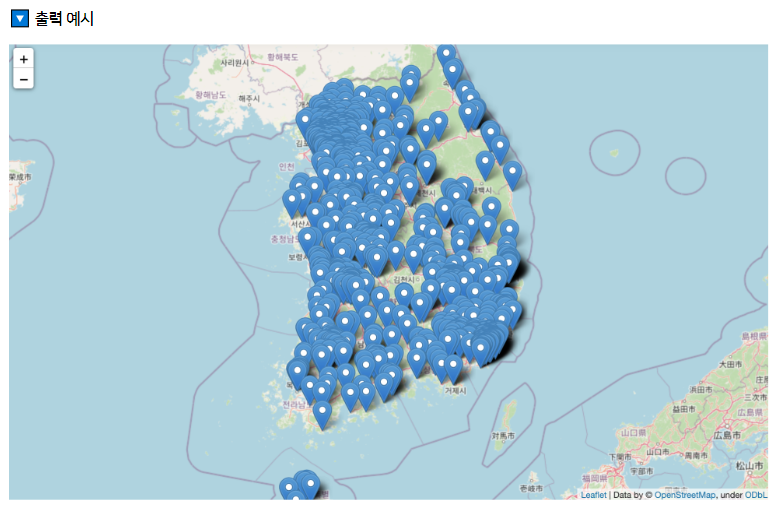

In [ ]:
import folium

In [ ]:
# 노인/치매병원 값이 뭔지 확인
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [ ]:
# 장병용
# 한국의 중심 좌표로 지도 생성
silver_hospital_map = folium.Map(location=[36.5, 127.5], zoom_start=7)

# '상권업종소분류명'이 '노인/치매병원'인 데이터 필터링
df_sliver_hospital = df[df['상권업종소분류명'] == '노인/치매병원']

# 데이터를 지도에 표시
for index, row in df_sliver_hospital.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],  # 병원의 위도와 경도 정보 사용
        popup=row['상호명'],  # 팝업에 병원명 표시
        icon=folium.Icon(color='green')  # 아이콘 색상 설정
    ).add_to(silver_hospital_map)


silver_hospital_map
